# CSC420 Assignment 3 Question 4

In [411]:
import matplotlib.pyplot as plt
import scipy
import cv2
import numpy as np
import math
from scipy.special import softmax
from matplotlib.pyplot import imread

In [412]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [413]:
def read_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def get_eigenvalues(det, tr):
    delta = np.sqrt(np.abs(tr * tr - 4 * det))
    lambda1 = (tr + delta) / 2
    lambda2 = (tr - delta) / 2
    return lambda1, lambda2

def get_sobel(img):
    grad_x = np.array(cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3))
    grad_y = np.array(cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3))
    return grad_x, grad_y

def get_det_trace(img, blur=5):
    Ix, Iy = get_sobel(img)

    IxIy = np.multiply(Ix, Iy)
    Ix2 = np.multiply(Ix, Ix)
    Iy2 = np.multiply(Iy, Iy)

    blur_size = (blur, blur)
    Ix2_blur = cv2.GaussianBlur(Ix2, blur_size, 10)
    Iy2_blur = cv2.GaussianBlur(Iy2, blur_size, 10)
    IxIy_blur = cv2.GaussianBlur(IxIy, blur_size, 10)

    det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur, IxIy_blur)
    trace = Ix2_blur + Iy2_blur

    return det, trace


In [414]:
def q5(path):
    img = read_image(path)
    det, trace = get_det_trace(img)
    lambda1, lambda2 = get_eigenvalues(det, trace)

    plt.figure(figsize=(6, 6))
    plt.subplot(111)
    plt.scatter(lambda1.flatten(), lambda2.flatten())
    plt.xlabel('Lambda1')
    plt.ylabel('Lambda2')
    plt.show()

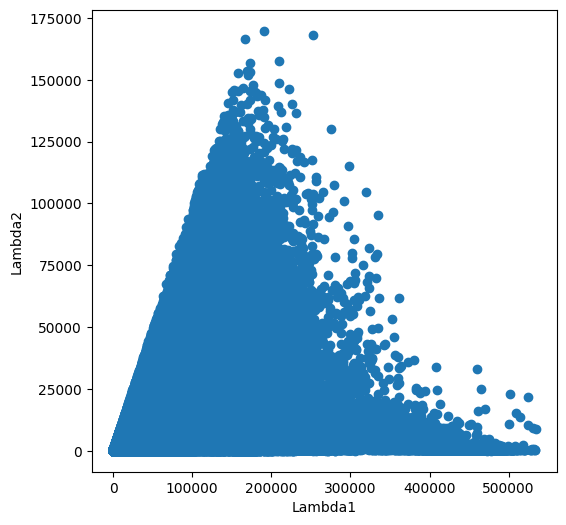

In [415]:
q5('/content/drive/My Drive/University_College,_University_of_Toronto.jpg')

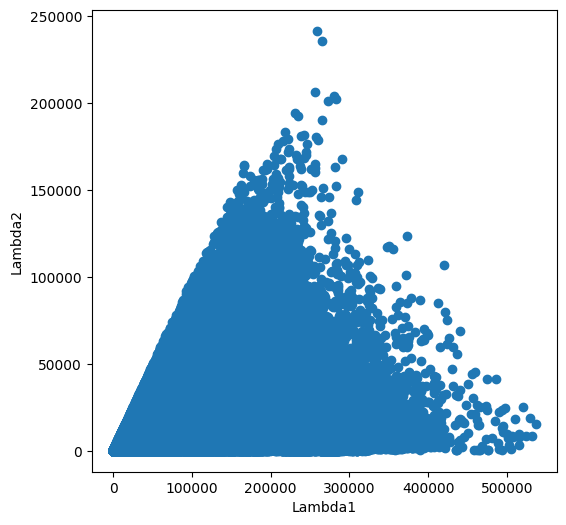

In [416]:
q5('/content/drive/My Drive/University_College_Lawn,_University_of_Toronto,_Canada.jpg')

In [417]:
def detect_corners(path, blur_size=5):
    img = read_image(path)
    det, trace = get_det_trace(img, blur_size)

    lambda1, lambda2 = get_eigenvalues(det, trace)

    thresh_1 = lambda1.max() / 5 * np.power(blur_size, 0.2)
    thresh_2 = lambda2.max() / 5 * np.power(blur_size, 0.2)

    lambda1_flags = np.where(lambda1.flatten() > thresh_1)
    lambda2_flags = np.where(lambda2.flatten() > thresh_2)

    flags = np.where((lambda1 > thresh_2) & (lambda2 > thresh_2))
    x, y = flags

    plt.imshow(imread(path))
    plt.scatter(y, x, s=0.1, color='red')
    plt.show()

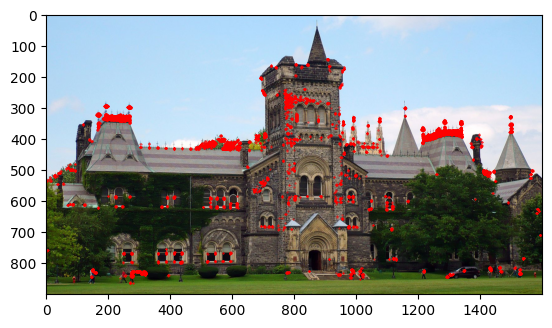

In [418]:
detect_corners('/content/drive/My Drive/University_College,_University_of_Toronto.jpg')

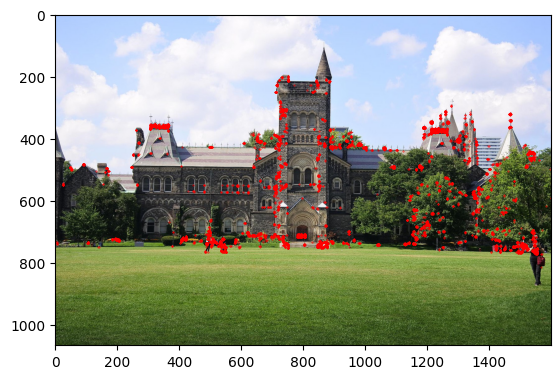

In [419]:
detect_corners('/content/drive/My Drive/University_College_Lawn,_University_of_Toronto,_Canada.jpg')

Corner detection with different window function

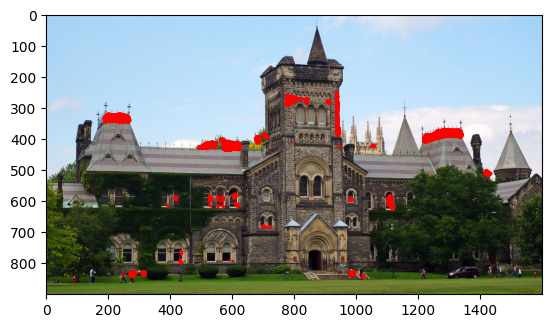

In [420]:
detect_corners('/content/drive/My Drive/University_College,_University_of_Toronto.jpg', 25)

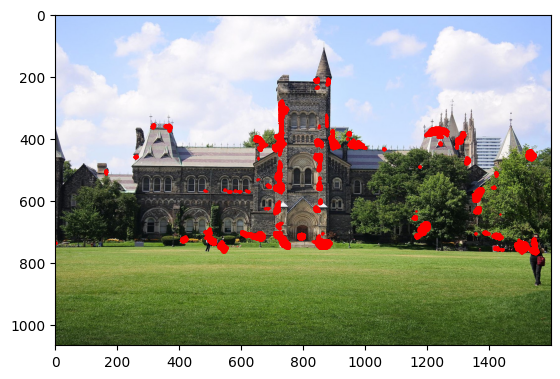

In [421]:
detect_corners('/content/drive/My Drive/University_College_Lawn,_University_of_Toronto,_Canada.jpg', 25)